In [1]:
# imports.py
from imports import *

# plotting magic
%matplotlib inline


# !!! Warning !!! 
# *** no more warnings ***
# import warnings
# warnings.filterwarnings("ignore")

# custom mods
import tidy

In [2]:
df = tidy.csv_btcusd()

cached csv


In [3]:
df = tidy.pre_cleaning(df)
df = tidy.add_targets(df)

In [4]:
df.isnull().sum()

open                  0
high                  0
low                   0
close                 0
volume                0
fwd_log_ret           0
fwd_ret               0
fwd_pct_chg           0
fwd_close_positive    0
dtype: int64

In [5]:
import waterman_python

cached csv


TypeError: Cannot join tz-naive with tz-aware DatetimeIndex

In [ ]:
df = waterman_python.time_features(df)

In [ ]:
df.head()

In [ ]:
df_circ = pd.read_csv('circulation_btc.csv')

In [ ]:
df_circ

In [ ]:
df_circ.info()

In [ ]:
# Make index datetime index
df_circ.Timestamp = pd.to_datetime(df_circ.Timestamp, utc=True)
# turn Timestamp to index
df_circ = df_circ.set_index('Timestamp')
# Mean index by day
df_circ = df_circ.resample('D').mean()
# Add to df
df = df.join(df_circ)

In [ ]:
df.tail()

In [ ]:
df = df.dropna()

In [ ]:
df.info()

In [ ]:
df['flow'] = df['total-bitcoins'] - df['total-bitcoins'].shift(1)

In [ ]:
df = df.dropna()

In [ ]:
df.head()

In [ ]:
df['stock_flow_ratio'] = df['flow'] / df['total-bitcoins']


In [ ]:
df.head()

In [ ]:
df['stock_flow_ratio_change'] = df['stock_flow_ratio'].shift(1) - df['stock_flow_ratio']

In [ ]:
df.head()

In [ ]:
df = df.dropna()

In [ ]:
df.head()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2807 entries, 2014-09-17 to 2022-05-24
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   open                2807 non-null   float64
 1   high                2807 non-null   float64
 2   low                 2807 non-null   float64
 3   close               2807 non-null   float64
 4   volume              2807 non-null   int64  
 5   fwd_log_ret         2807 non-null   float64
 6   fwd_ret             2807 non-null   float64
 7   fwd_pct_chg         2807 non-null   float64
 8   fwd_close_positive  2807 non-null   bool   
dtypes: bool(1), float64(7), int64(1)
memory usage: 200.1 KB


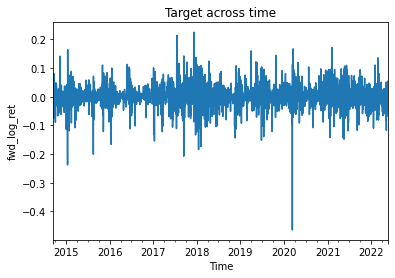

In [17]:
df.fwd_log_ret.plot(kind='line')
plt.xlabel('Time')
plt.ylabel('fwd_log_ret')
plt.title('Target across time')
plt.show()